In [2]:
import pandas as pd

In [3]:
ai_papers = pd.read_csv('./datasets/ai_papers.csv')
dl_papers = pd.read_csv('./datasets/dl_papers.csv')
cv_papers = pd.read_csv('./datasets/cv_papers.csv')


In [4]:
ai_papers = ai_papers.iloc[:50, :]
dl_papers = dl_papers.iloc[:50, :]
cv_papers = cv_papers.iloc[:50, :]

In [5]:
# Adicionando coluna 'label'

ai_papers['label'] = "Artificial Intelligence"
dl_papers['label'] = "Digital Libraries"
cv_papers['label'] = "Computer Vision"


In [6]:
# Concatenando os datasets e exportando

papers = pd.concat([ai_papers, dl_papers, cv_papers])
if 'Unnamed: 0' in papers.columns:
    papers.drop(['Unnamed: 0'], axis=1, inplace=True)

## Primeira análise: distilBert + abstracts

In [7]:
# Alterando colunas para "text" e "label"

abstracts = papers[['abstract', 'label']]
abstracts = abstracts.rename({'abstract':'text'}, axis=1)

In [8]:
# # !pip install spacy
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def remove_stopwords_spacy(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
#     return ' '.join(tokens)

# abstracts['text'] = abstracts['text'].apply(remove_stopwords_spacy)

# print(abstracts['text'])


In [9]:
# Pipeline para acelerar transformação para Dataset do HuggingFace

def hf_pipeline(data):
    from datasets import Dataset, ClassLabel

    unique_classes = data['label'].unique()

    dataframe = Dataset.from_pandas(data)
    class_label = ClassLabel(names=list(unique_classes))

    dataframe = dataframe.cast_column('label', class_label)

    return dataframe

In [10]:
abstracts = hf_pipeline(abstracts)

/home/lipecorradini/.cache/pypoetry/virtualenvs/llm-mri-RE74i_Ji-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Casting the dataset: 100%|██████████| 150/150 [00:00<00:00, 51879.74 examples/s]


In [11]:
# Definindo o distilBert como primeiro modelo a ser usado

model_ckpt = 'distilbert-base-uncased'

In [12]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA

pca = PCA(n_components=40)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

### Obtendo métricas para o distilbert-base-uncased

In [13]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 150/150 [00:36<00:00,  4.07 examples/s]


Custom colors: {0: (0.2298057, 0.298717966, 0.753683153, 1.0), 1: (0.705673158, 0.01555616, 0.150232812, 1.0)}
[0, 1]


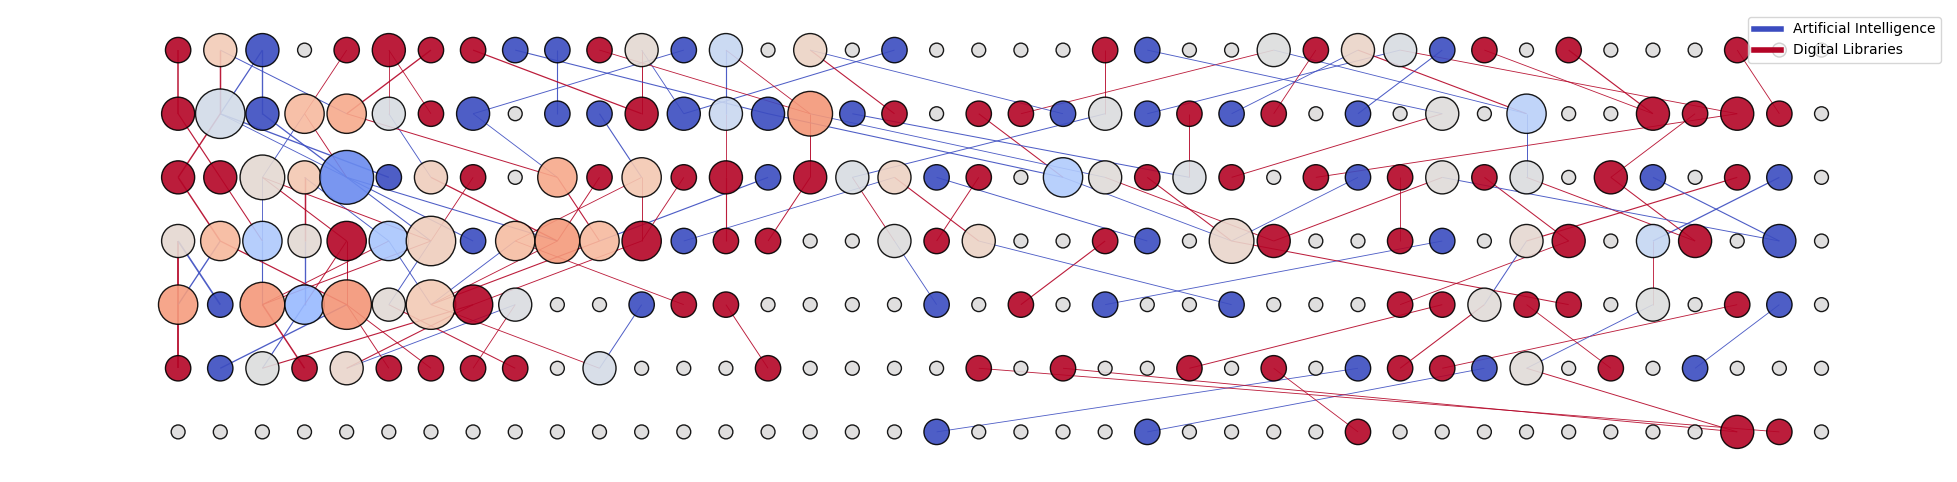

In [14]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

Custom colors: {0: (0.2298057, 0.298717966, 0.753683153, 1.0), 1: (0.705673158, 0.01555616, 0.150232812, 1.0)}
[0, 2]


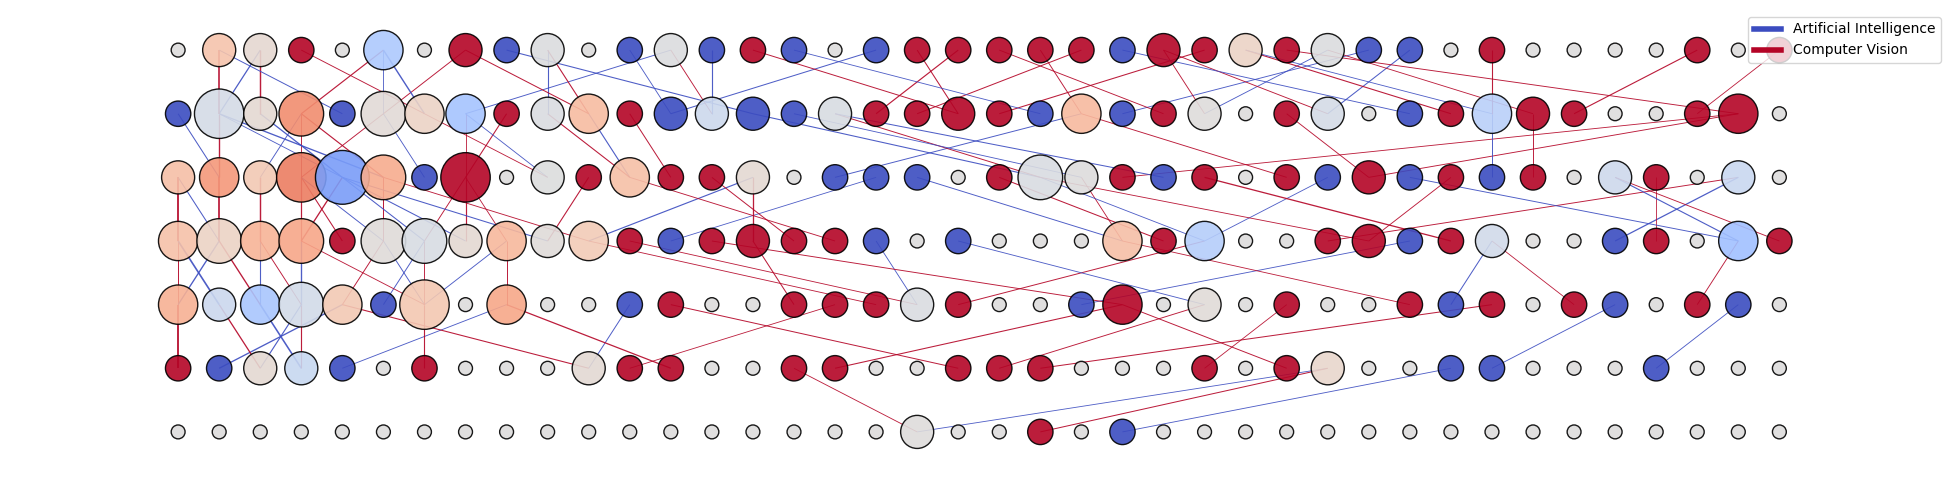

In [15]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

Custom colors: {0: (0.2298057, 0.298717966, 0.753683153, 1.0), 1: (0.705673158, 0.01555616, 0.150232812, 1.0)}
[1, 2]


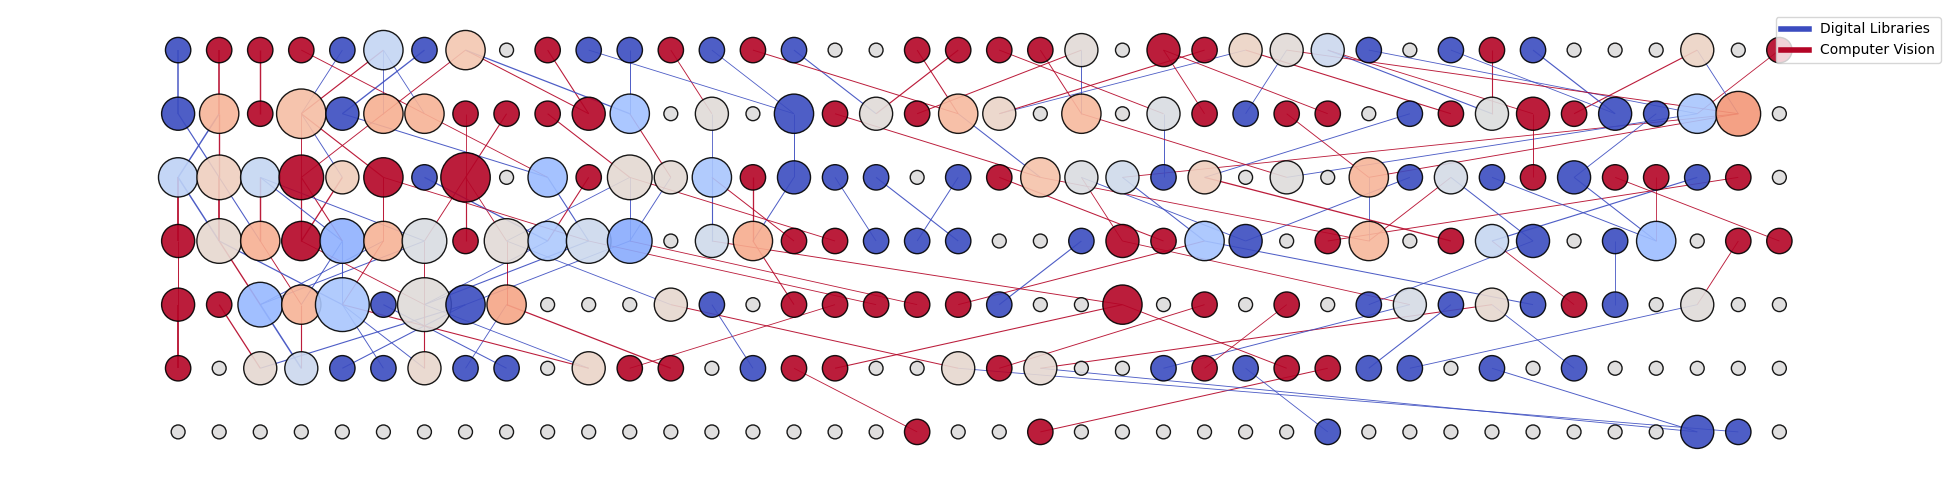

In [16]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Digital Libraries', 'Computer Vision'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

## Obtendo métricas para o bert-base-uncased

In [17]:
model = 'bert-base-uncased'

In [18]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA

pca = PCA(n_components=20)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

In [19]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 150/150 [00:36<00:00,  4.07 examples/s]


Custom colors: {0: (0.2298057, 0.298717966, 0.753683153, 1.0), 1: (0.705673158, 0.01555616, 0.150232812, 1.0)}
[0, 1]


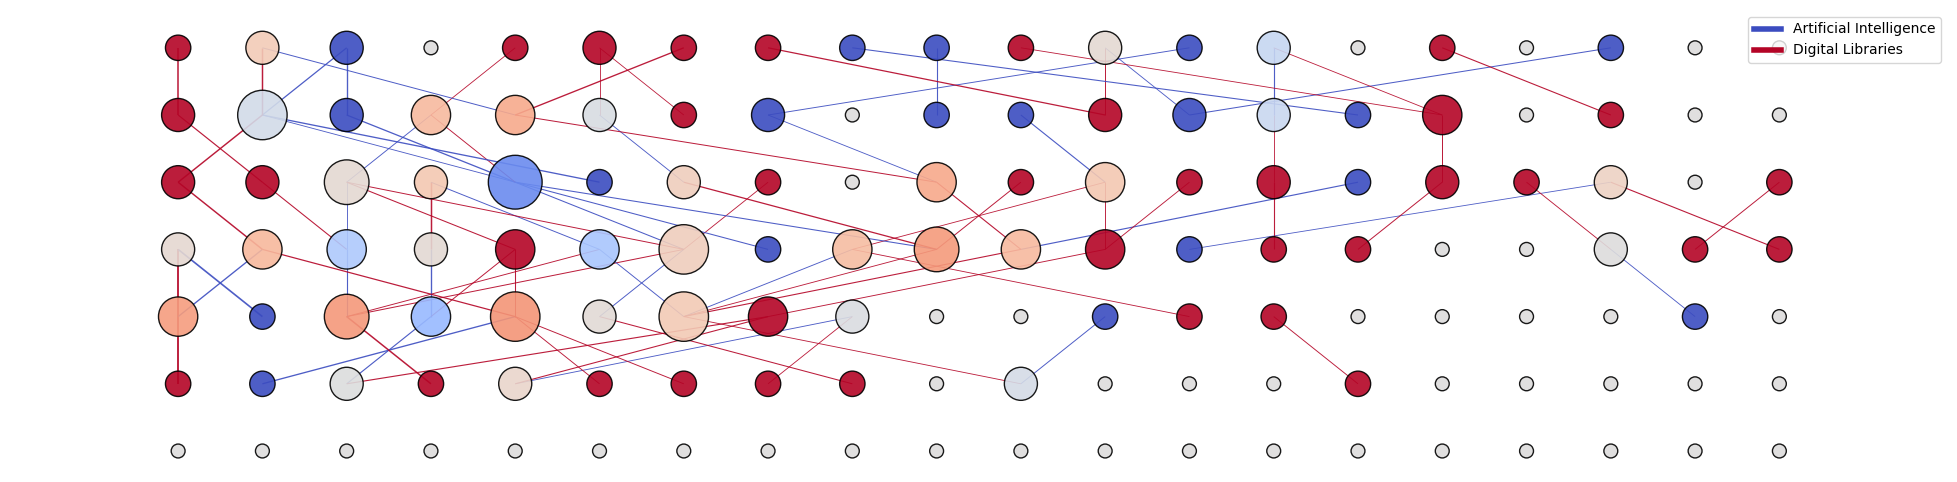

In [20]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

Custom colors: {0: (0.2298057, 0.298717966, 0.753683153, 1.0), 1: (0.705673158, 0.01555616, 0.150232812, 1.0)}
[0, 2]


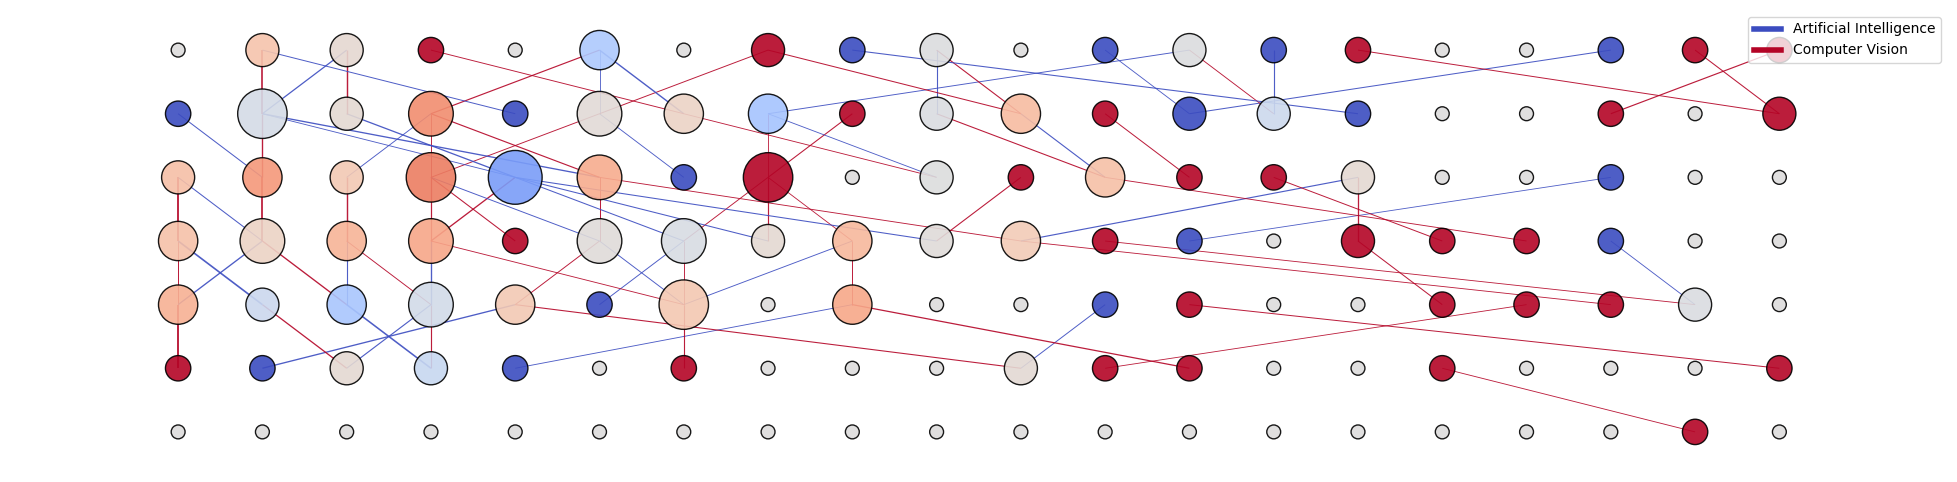

In [21]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

Custom colors: {0: (0.2298057, 0.298717966, 0.753683153, 1.0), 1: (0.705673158, 0.01555616, 0.150232812, 1.0)}
[2, 1]


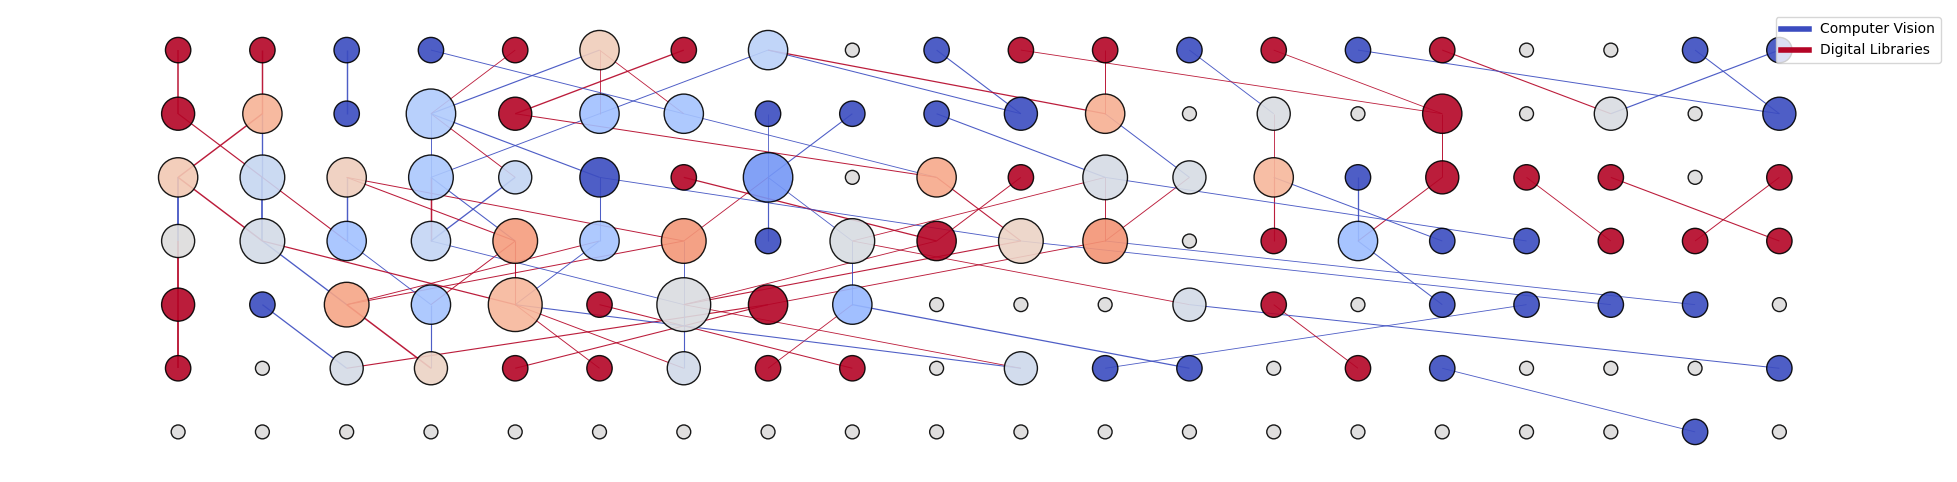

In [22]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Computer Vision', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()